In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

In [ ]:
file_path = '/content/drive/MyDrive/Raw_Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# --- Basic Info ---
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# --- Check Missing Values ---
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Drop or fill missing values
df = df.dropna()

In [ ]:
# --- Check Duplicates ---
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


In [ ]:
df = df.drop_duplicates()

# --- Confirm Data Cleaning ---
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

# EDA

In [ ]:
# --- General Overview ---
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# --- Check unique churn values ---
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


In [ ]:
# --- Churn Rate ---
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


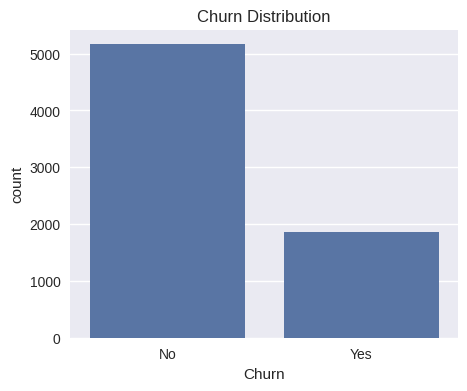

In [ ]:
# --- Visualize Churn Distribution ---
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Visualization & Insights

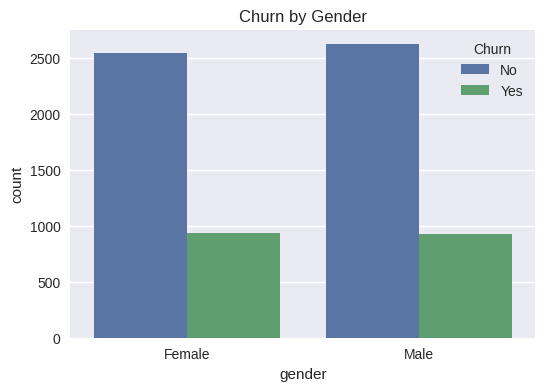

In [ ]:
#Churn by Gender

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Churn by Gender')
plt.show()

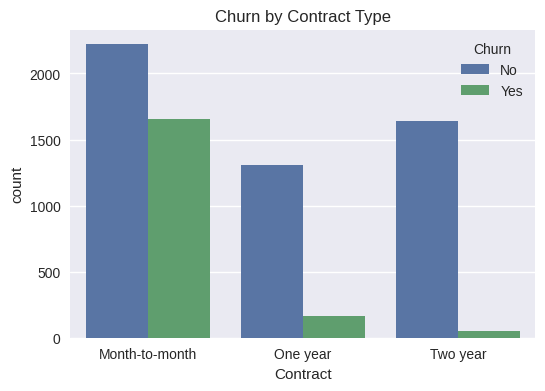

In [ ]:
#Churn by Contract Type

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.show()

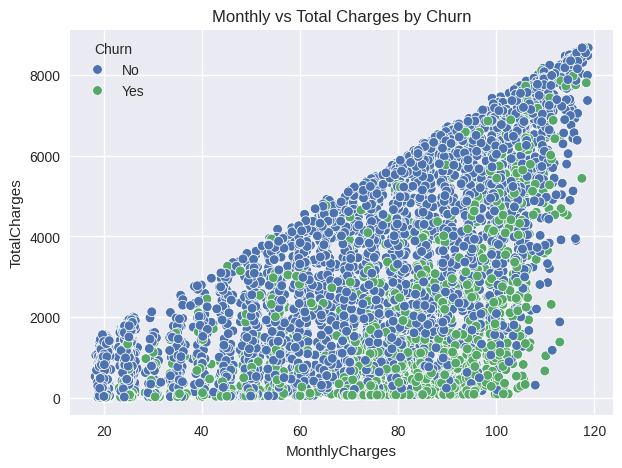

In [ ]:
#Monthly Charges vs Total Charges

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.title('Monthly vs Total Charges by Churn')
plt.show()

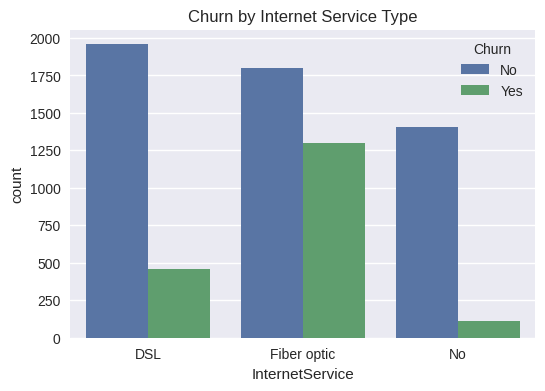

In [ ]:
#Churn by Internet Service

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service Type')
plt.show()

# Storytelling & Insights

1. About 26% of customers have churned, indicating a moderate churn rate.
2. Month-to-month contract users have a significantly higher churn rate than long-term contracts.
3. Customers with fiber optic internet are more likely to churn compared to DSL users.
4. High monthly charges and short contract durations are strong churn indicators.
5. Male and female customers show similar churn patterns — gender doesn’t strongly influence churn.

In [ ]:
df.to_csv('/content/drive/MyDrive/datasets/WA_Fn-UseC_-Telco-Customer-Churn_Cleaned.csv', index=False)

# Task
Explain the error in the selected code, fix it, and incorporate the changes into the existing code.

## Save Charts

### Subtask:
Save each generated chart as a PNG file to the specified paths.

In [29]:
# Save Churn by Gender chart
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Churn by Gender')
plt.savefig(charts_path_list[0])
plt.close()

# Save Churn by Contract Type chart
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.savefig(charts_path_list[1])
plt.close()

# Save Monthly Charges vs Total Charges chart
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.title('Monthly vs Total Charges by Churn')
plt.savefig(charts_path_list[2])
plt.close()

# Save Churn by Internet Service chart
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service Type')
plt.savefig(charts_path_list[3])
plt.close()

## Define chart paths

### Subtask:
Create a list of file paths for each chart.


**Reasoning**:
Create a list of file paths for each chart to be saved.



In [30]:
charts_path = '/content/drive/MyDrive/datasets/results/charts/'
charts_path_list = [
    charts_path + 'churn_by_gender.png',
    charts_path + 'churn_by_contract.png',
    charts_path + 'monthly_vs_total_charges_by_churn.png',
    charts_path + 'churn_by_internet_service.png'
]

In [32]:
# Insights Export ---
insights = """

# WA_Fn-UseC_-Telco-Customer-Churn Insights

1. About 26% of customers have churned, indicating a moderate churn rate.
2. Month-to-month contract users have a significantly higher churn rate than long-term contracts.
3. Customers with fiber optic internet are more likely to churn compared to DSL users.
4. High monthly charges and short contract durations are strong churn indicators.
5. Male and female customers show similar churn patterns — gender doesn’t strongly influence churn.
"""

# Save as Markdown file
insights_path = '/content/drive/MyDrive/datasets/insights/WA_Fn-UseC_-Telco-Customer-Churn_insights.md'

# Ensure folder exists
import os
os.makedirs(os.path.dirname(insights_path), exist_ok=True)

with open(insights_path, 'w') as f:
    f.write(insights)

print(f"Insights saved to: {insights_path}")

Insights saved to: /content/drive/MyDrive/datasets/insights/WA_Fn-UseC_-Telco-Customer-Churn_insights.md
